<a href="https://colab.research.google.com/github/Darth-Vaader/trade-execution/blob/main/logo_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# YOLOv11 for brand detection

Kurt Ma, Panagora '25S Applicant
---

Dataset links:
I used my self-annotated dataset with YOLO v11 for this assignment, partially referred this dataset online: http://image.ntua.gr/iva/datasets/flickr_logos/

For a better, universal logo detection task, we can enhance our model with this dataset containing 3k logos: https://github.com/Wangjing1551/LogoDet-3K-Dataset

API used: roboflow with YOLOv11, https://github.com/ultralytics/ultralytics.

YOLO’s speed, accuracy, and ability to detect multiple logos make it an appealing method.


Interesting Paper I Reviewed:
1. Sujuan Hou, Jiacheng Li, Weiqing Min, Qiang Hou, Yanna Zhao, Yuanjie Zheng, and Shuqiang Jiang. 2023.
Deep Learning for Logo Detection: A Survey. ACMTrans.Multimedia Comput. Commun. Appl. 20, 3, Article 72
(October 2023), 23 pages.
https://doi.org/10.1145/3611309

2. Wang, C.-Y., Bochkovskiy, A., & Liao, H.-Y. M. (2022).
YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors.
https://arxiv.org/pdf/2207.02696
'''

## Setup

In [3]:
!nvidia-smi

Fri Jan 24 08:10:29 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [5]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


In [6]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 31.1/235.7 GB disk)


## Fine-tune YOLO11 on custom dataset

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YfgJOlDCGctvLnG3n0pt")
project = rf.workspace("km-bnqoq").project("brand_detection-ptsdt")
version = project.version(7)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brand_Detection-7 in yolov11:: 100%|██████████| 1244/1244 [00:00<00:00, 5159.40it/s]


## Custom Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=75 batch =16 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 33.4MB/s]
New https://pypi.org/project/ultralytics/8.3.66 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Brand_Detection-7/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=No

In [9]:
!ls runs/detect/train/

args.yaml					    PR_curve.png	 train_batch2212.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1737706288.03b6762c03d5.1391.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2210.jpg  weights
P_curve.png					    train_batch2211.jpg


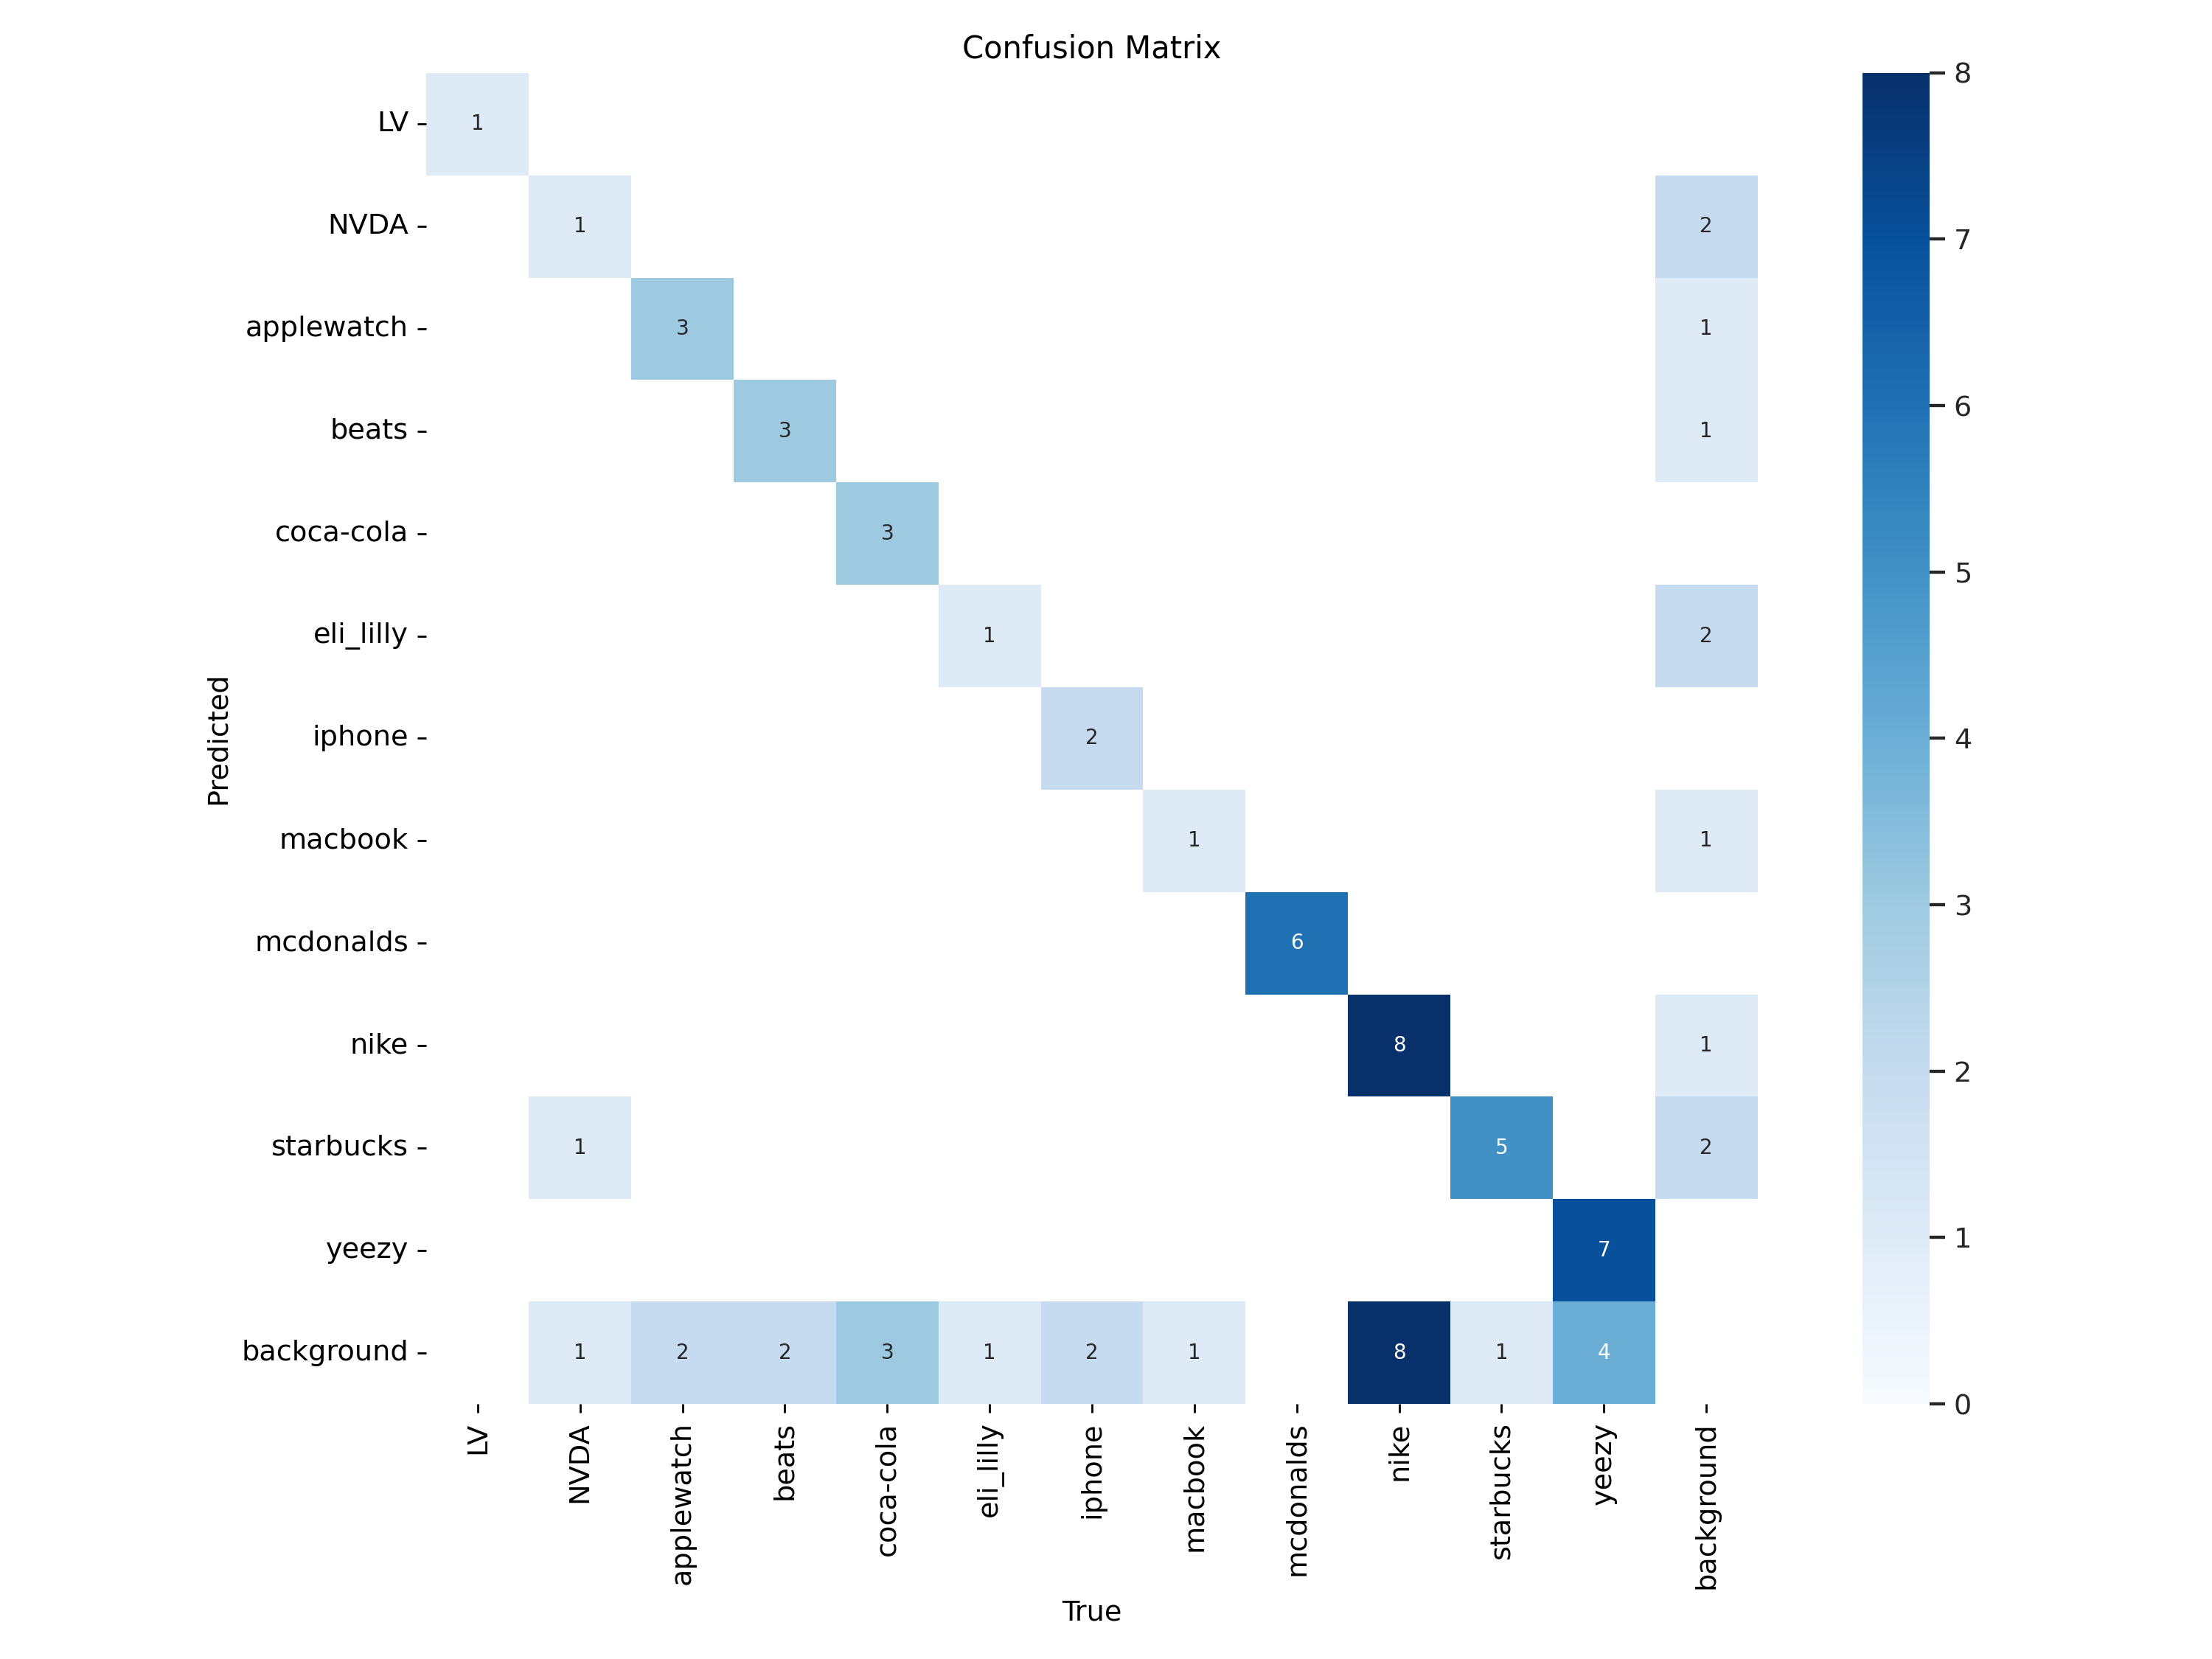

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/confusion_matrix.png', width=600)

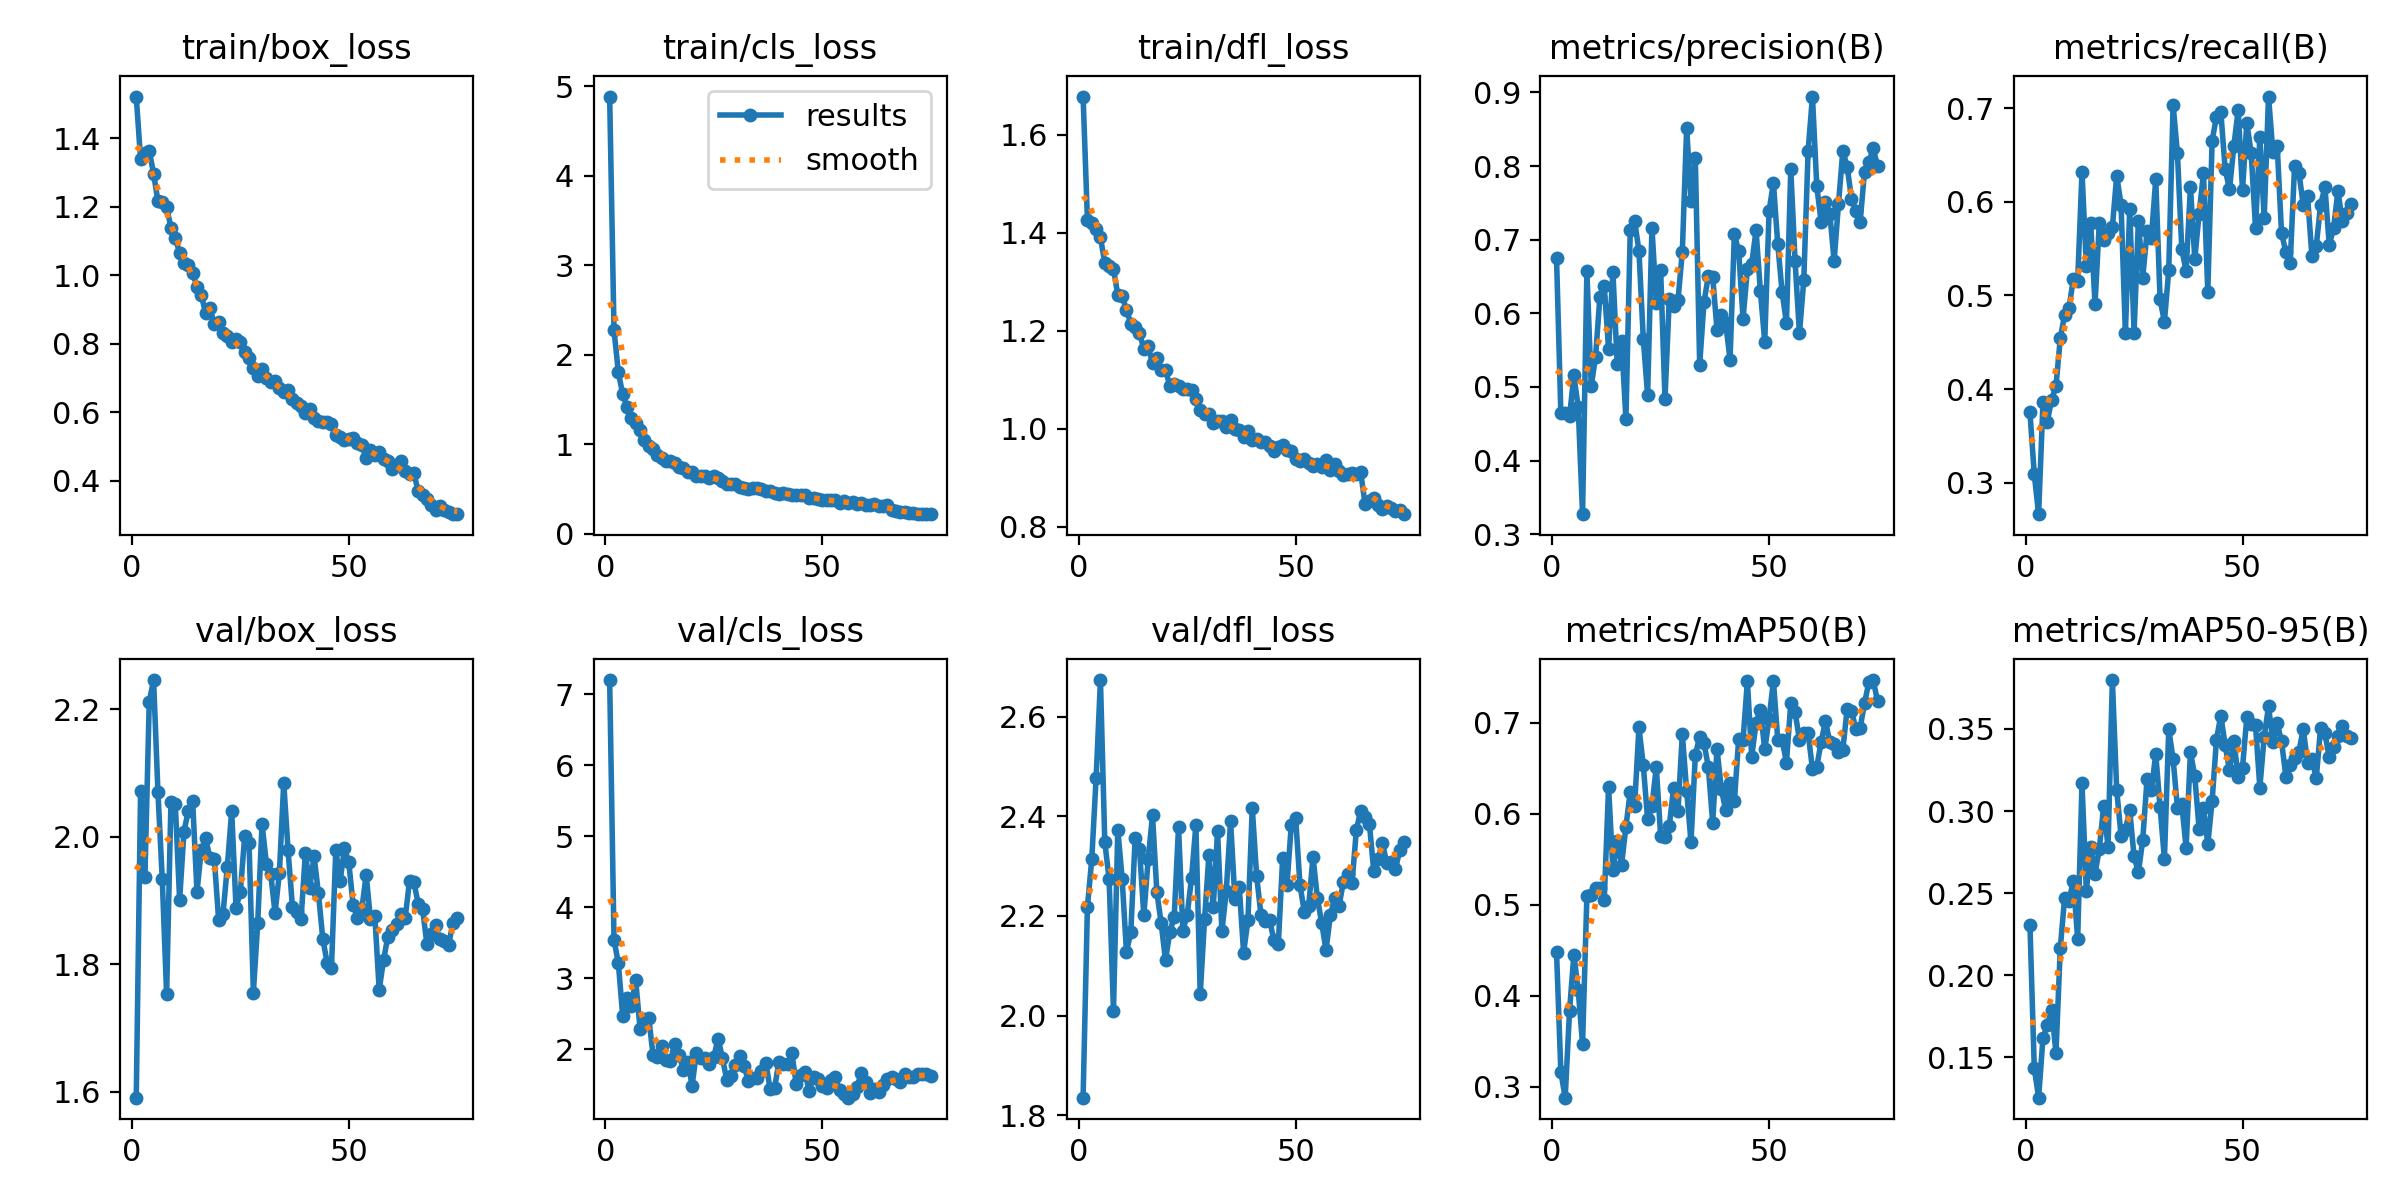

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

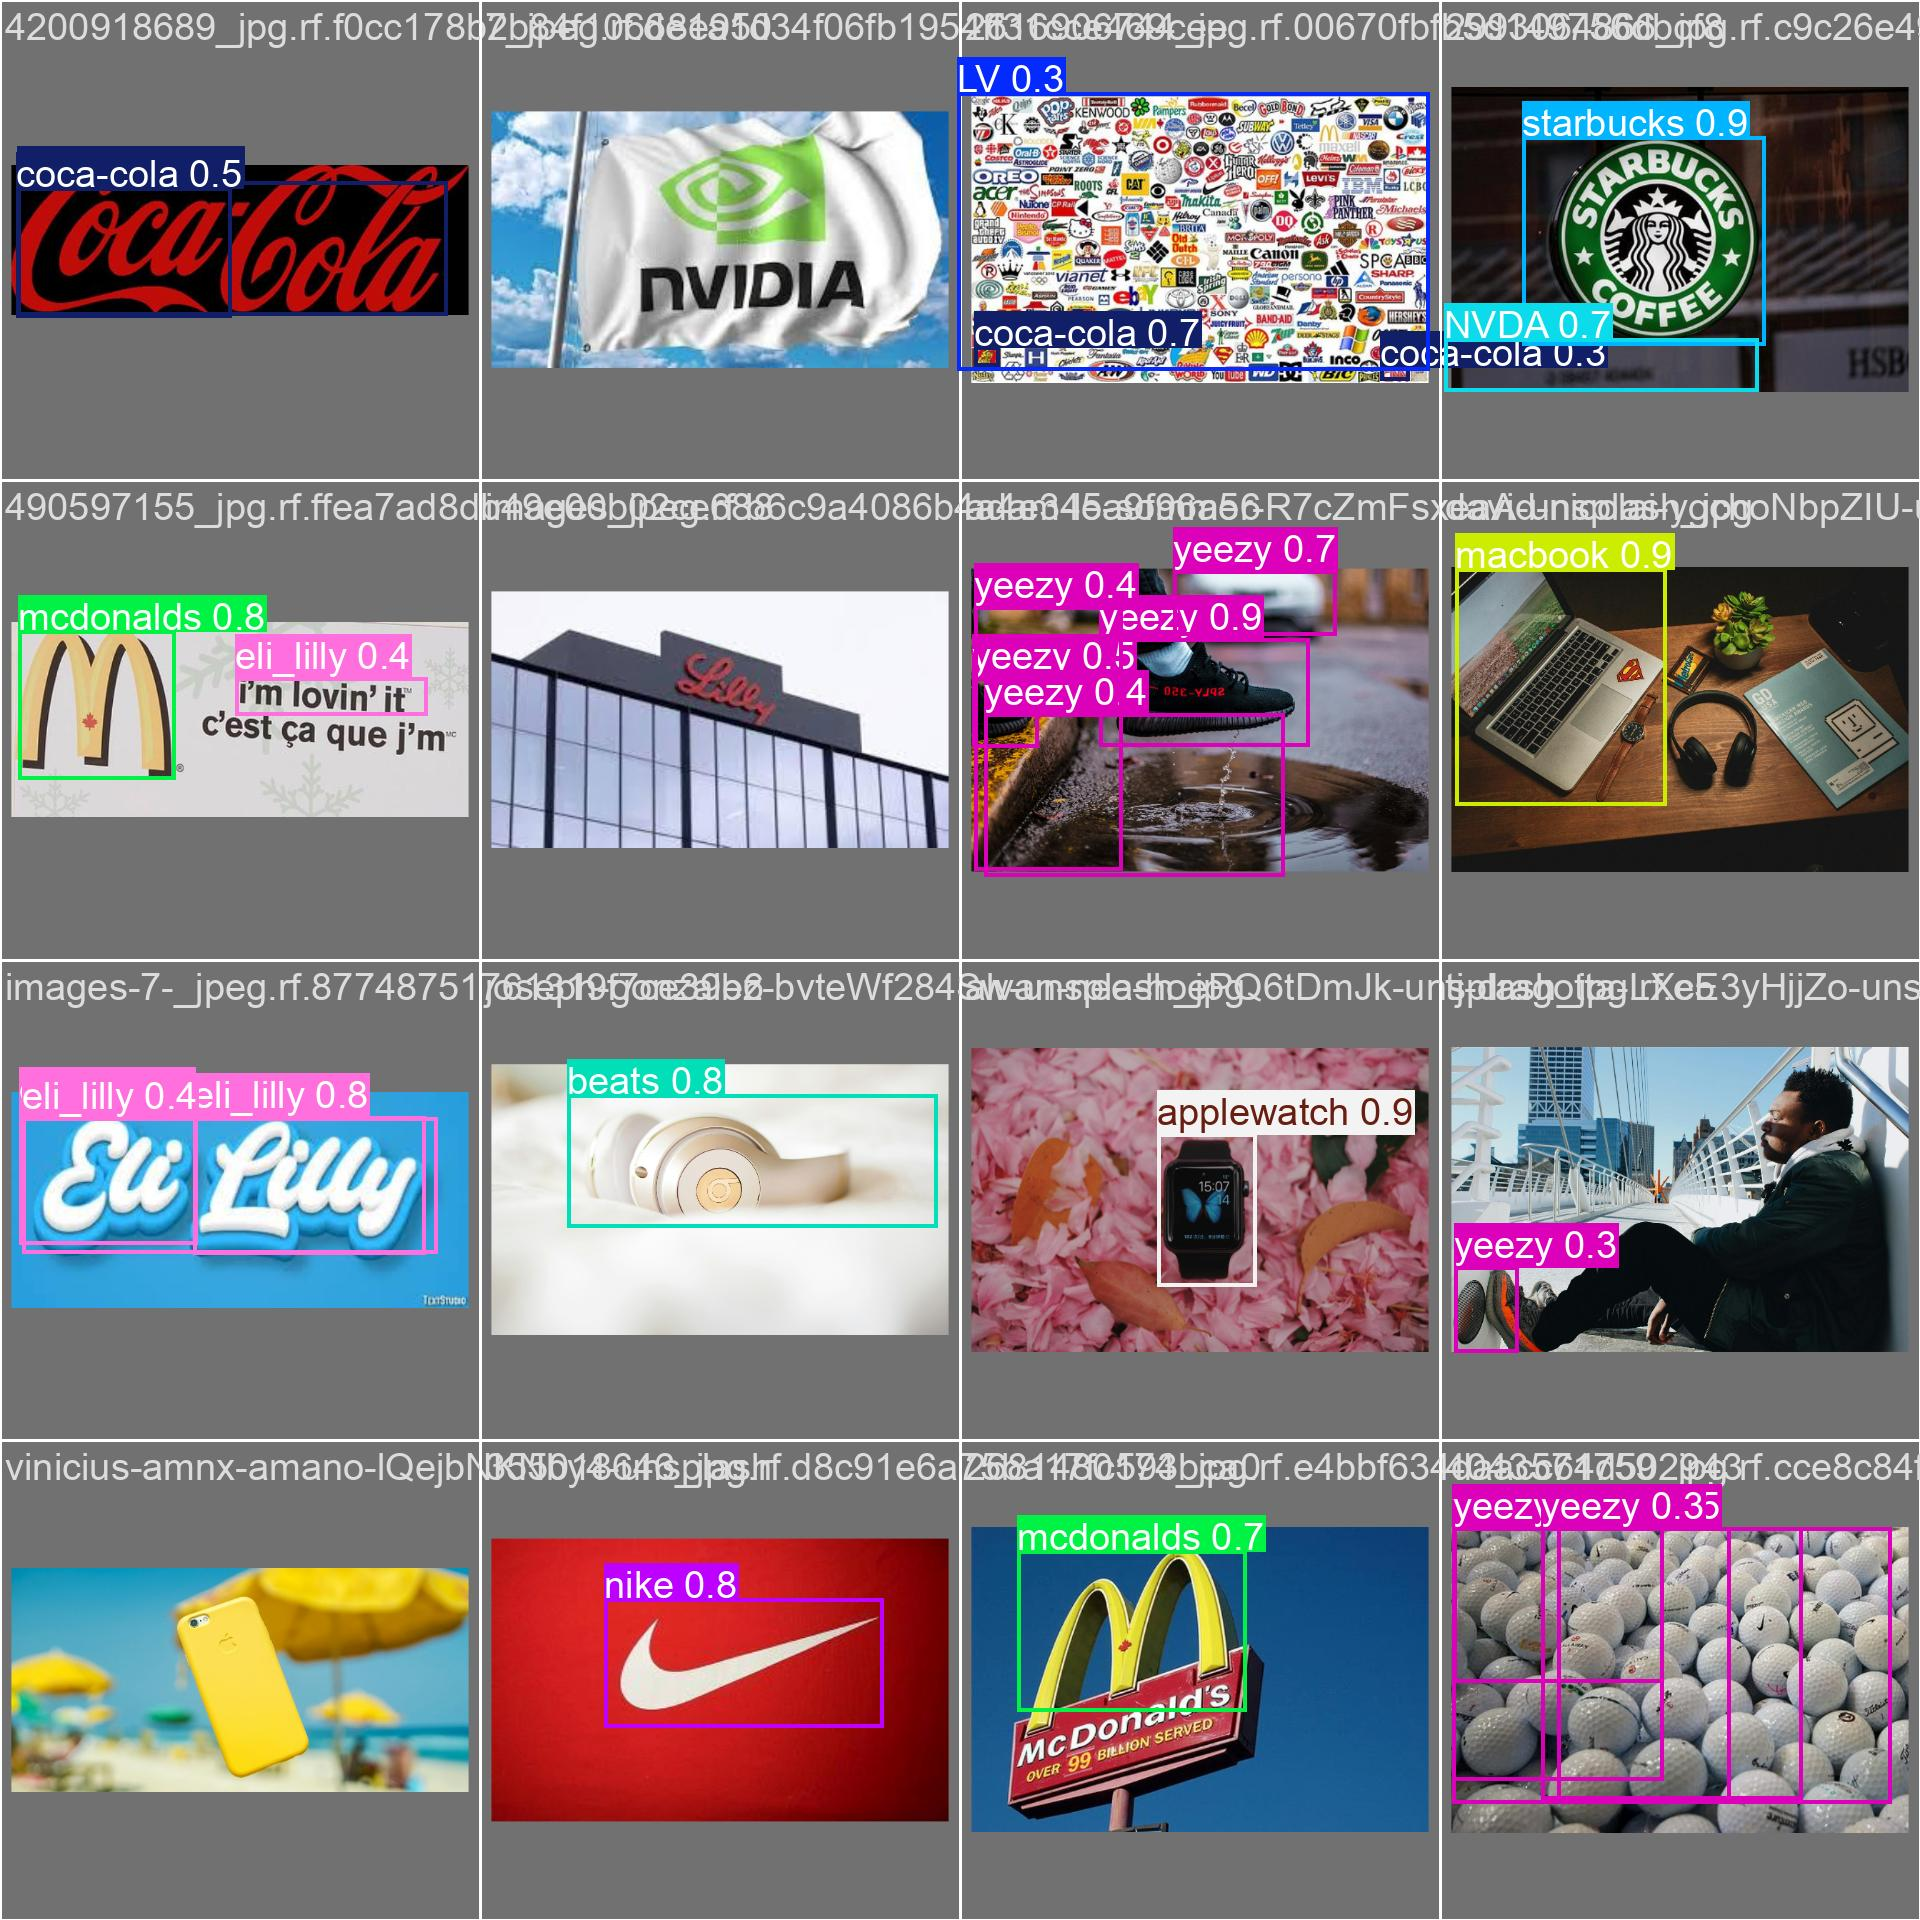

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [12]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,417,444 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/Brand_Detection-7/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:01<00:00,  2.10it/s]
                   all         50         67       0.76       0.61        0.7      0.382
                    LV          1          1       0.86          1      0.995      0.298
                  NVDA          3          3          0          0      0.298      0.143
            applewatch          4          5          1      0.421      0.715      0.401
                 beats          5          5      0.917        0.6      0.699        0.2
             coca-cola          5          6      0.634      0.833      0.759      0.393
             eli_lilly          2          2    

## Inference with custom model

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,417,444 parameters, 0 gradients, 21.3 GFLOPs

image 1/32 /content/Brand_Detection-7/test/images/10_png.rf.1f00bc9c1405a31f45a6da4914eba3a1.jpg: 640x640 1 eli_lilly, 1 starbucks, 15.6ms
image 2/32 /content/Brand_Detection-7/test/images/228153666_jpg.rf.5a476c0b09d4ba3261dc096bcc9b562f.jpg: 480x640 1 starbucks, 44.4ms
image 3/32 /content/Brand_Detection-7/test/images/239985057_jpg.rf.21811b61cdeadb04778f6f6d5d3cfd27.jpg: 480x640 1 nike, 12.4ms
image 4/32 /content/Brand_Detection-7/test/images/2421405885_jpg.rf.8446e399a6c3092602be84410a91fe0b.jpg: 640x608 2 starbuckss, 44.8ms
image 5/32 /content/Brand_Detection-7/test/images/2439319086_jpg.rf.a09b212efc02f0da7dccf3aec7d52657.jpg: 640x480 1 starbucks, 42.7ms
image 6/32 /content/Brand_Detection-7/test/images/2584787090_jpg.rf.28281e09207c1df543c7f27738c3a7b9.jpg: 256x640 (no detections), 44.8ms
image 7/32 /content/Brand_

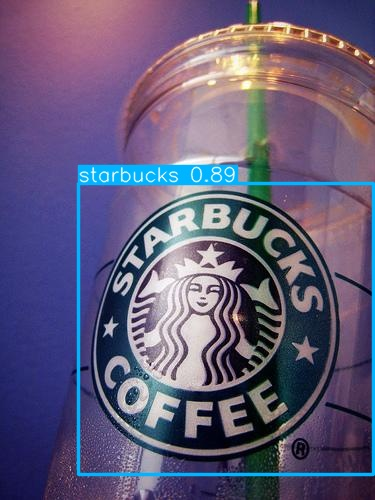

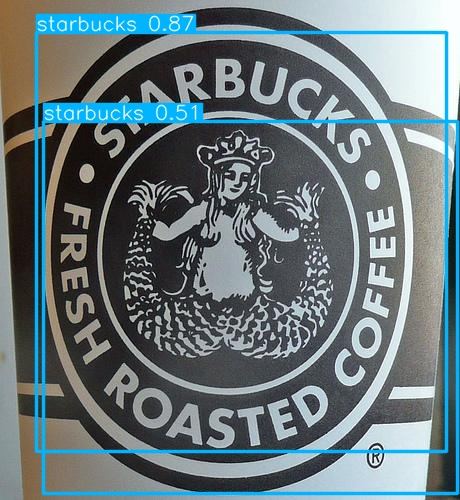

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:2]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deploy model

In [15]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/km-bnqoq/brand_detection-ptsdt/7
Share your model with the world at: https://universe.roboflow.com/km-bnqoq/brand_detection-ptsdt/model/7


In [23]:
!pip install inference

Running inference on classify.png


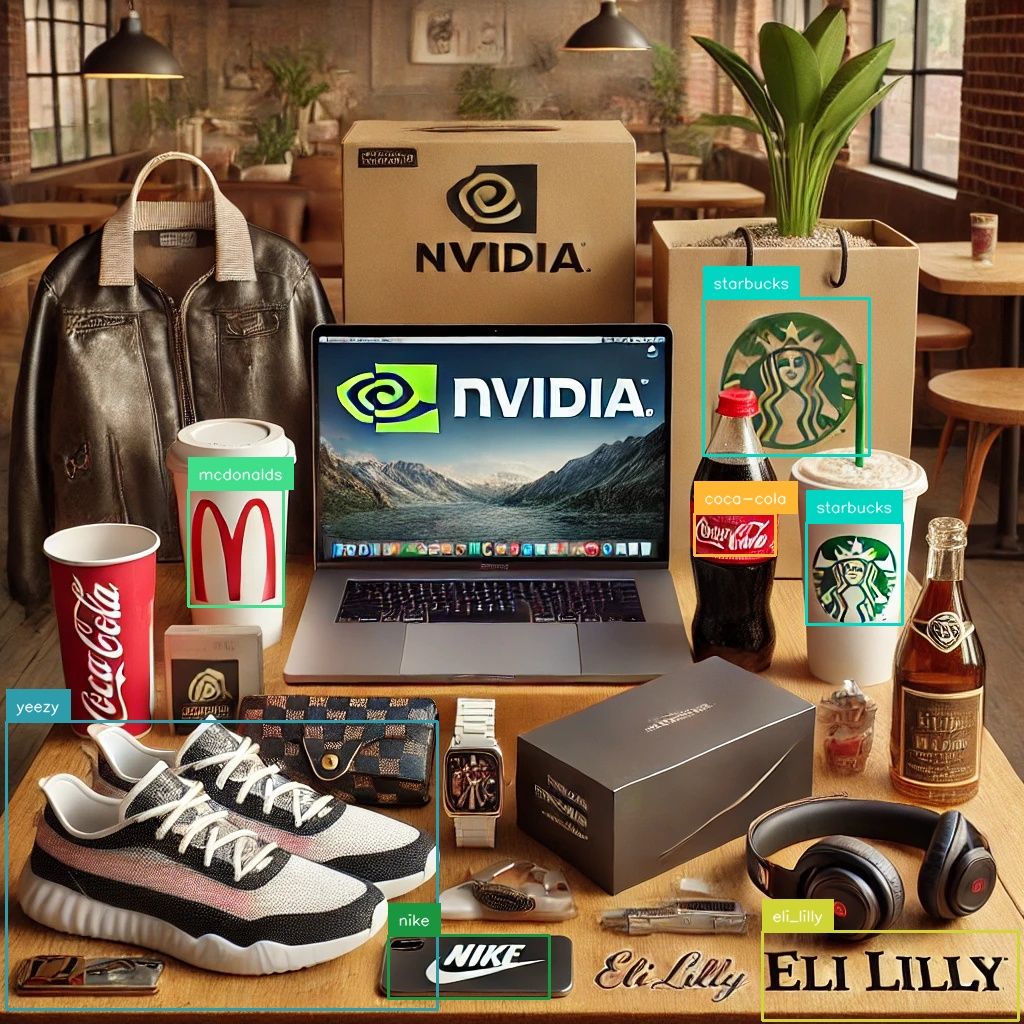

In [46]:
import os, random, cv2
import supervision as sv
import IPython
import inference

model_id = project.id.split("/")[1] + "/" + dataset.version
model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

test_set_loc = dataset.location + "/test/Panagora_Final"
test_images = os.listdir(test_set_loc)

# Run inference on 4 random test images, or fewer if fewer images are available
for img_name in random.sample(test_images, min(1, len(test_images))):
    print("Running inference on " + img_name)

    # Load image
    image = cv2.imread(os.path.join(test_set_loc, img_name))

    # Perform inference
    results = model.infer(image, confidence=0.2, overlap=75)[0]
    detections = sv.Detections.from_inference(results)

    # Annotate boxes and labels
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    annotated_image = box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Display annotated image
    _, ret = cv2.imencode('.jpg', annotated_image)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)


##Potential Future Enhancement:

1. More Annotated Data
Some classes exhibit lower mAP (especially NVDA and ELI LILLY) primarily due to limited labeled samples. With only a small number of images annotated (done manually), the model may not generalize well. Gathering more varied examples—especially for underrepresented classes—would likely boost recognition performance.

2. False Positive Polishing
To refine logo recognition, consider integrating a post-processing step using:
SVM trained on feature embeddings, and
BEiT + Image Similarity (e.g., cosine similarity).
This second-stage “verification” would help confirm each detected logo, reduce false positives, and further differentiate visually similar classes.







## Statement of Appreciation and Interest

This assignment for Panagora is, without a doubt, the most unique assessment I’ve ever encountered. I am genuinely grateful for the opportunity to work on a project that has allowed me to learn and grow. My problem-solving skills, math proficiency, and research experience would be valuable assets to the team.

Additionally, I had the pleasure of meeting Mr. Nick Alonso at Duke last semester, where he introduced me to Panagora. I was deeply impressed by the firm’s culture and values, especially its commitment to tackling financial challenges through a rigorous quantitative lens. Given my background and interests, I believe I would be an excellent fit for this role, and I’m excited about the prospect of joining the team.